# NYC Taxi Fare & Duration
## Exploratory Data Analysis (EDA)

In [3]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Imports

In [4]:
import os
import sys
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import wget

import app_config

# Check if we are in COLAB
IN_COLAB = 'google.colab' in sys.modules

In [7]:
if not os.path.exists("dataset/yellow_tripdata_2022-05.parquet"):
    if IN_COLAB:
        !wget https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2022-05.parquet dataset/
    else:
        wget.download(app_config.START_DATASET_URL, "dataset/")

## Read Dataset

In [8]:
dataset = pd.read_parquet("dataset/yellow_tripdata_2022-05.parquet")

### List of columns

In [9]:
dataset.columns.to_list()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'airport_fee']

### Types of columns

In [10]:
dataset.dtypes

VendorID                          int64
tpep_pickup_datetime     datetime64[us]
tpep_dropoff_datetime    datetime64[us]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
airport_fee                     float64
dtype: object

Conclusions
* We have tpep_pickup_datetime, tpep_dropoff_datetime to calculate trip duration.


### Head / Describe

In [11]:
dataset.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2022-05-01 00:00:36,2022-05-01 00:19:18,1.0,4.1,1.0,N,246,151,2,17.0,3.0,0.5,0.00,0.0,0.3,20.80,2.5,0.0
1,1,2022-05-01 00:27:44,2022-05-01 00:41:33,1.0,2.3,1.0,N,238,74,2,11.0,3.0,0.5,0.00,0.0,0.3,14.80,2.5,0.0
2,1,2022-05-01 00:59:00,2022-05-01 01:14:22,1.0,4.2,1.0,N,163,260,2,15.5,3.0,0.5,0.00,0.0,0.3,19.30,2.5,0.0
3,1,2022-05-01 00:48:18,2022-05-01 01:28:02,1.0,0.0,1.0,N,79,182,1,41.2,0.0,0.5,0.00,0.0,0.3,42.00,0.0,0.0
4,1,2022-05-01 00:28:26,2022-05-01 00:37:49,1.0,1.6,1.0,N,238,75,1,7.5,3.0,0.5,2.25,0.0,0.3,13.55,2.5,0.0


* trip_distance is one of the target variables
* fare_amount is one of the target variables

Relevant features:
* How do we know the start and stop locations? From GPS coordinates?
* passenger_count could be relevant.
* PULocationID, DOLocationID, these describe taxi zones, they are relevant.
* RateCodeID: Tells which rate was applied at the end of the trip.

Check this web page:
https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf

Total amount = Fare + Overnight_Charges + RushHour_Charges + 

In [12]:
dataset.describe()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
count,3.588295e+06,3588295,3588295,3.458771e+06,3.588295e+06,3.458771e+06,3.588295e+06,3.588295e+06,3.588295e+06,3.588295e+06,3.588295e+06,3.588295e+06,3.588295e+06,3.588295e+06,3.588295e+06,3.588295e+06,3.458771e+06,3.458771e+06
mean,1.713103e+00,2022-05-16 07:50:29.219312,2022-05-16 08:08:42.275203,1.393923e+00,6.856861e+00,1.365674e+00,1.645738e+02,1.625517e+02,1.183209e+00,1.516813e+01,1.020728e+00,4.891096e-01,2.824744e+00,5.827756e-01,2.964299e-01,2.207840e+01,2.282808e+00,1.008364e-01
min,1.000000e+00,2003-01-01 00:06:06,2003-01-01 00:31:38,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,-1.311500e+03,-4.500000e+00,-5.000000e-01,-1.457000e+02,-5.075000e+01,-3.000000e-01,-1.314800e+03,-2.500000e+00,-1.250000e+00
25%,1.000000e+00,2022-05-08 18:14:16.500000,2022-05-08 18:32:36,1.000000e+00,1.150000e+00,1.000000e+00,1.320000e+02,1.130000e+02,1.000000e+00,7.000000e+00,0.000000e+00,5.000000e-01,1.000000e+00,0.000000e+00,3.000000e-01,1.235000e+01,2.500000e+00,0.000000e+00
50%,2.000000e+00,2022-05-16 09:14:42,2022-05-16 09:33:15,1.000000e+00,1.960000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,1.050000e+01,5.000000e-01,5.000000e-01,2.160000e+00,0.000000e+00,3.000000e-01,1.630000e+01,2.500000e+00,0.000000e+00
75%,2.000000e+00,2022-05-23 18:03:17,2022-05-23 18:21:03.500000,1.000000e+00,3.730000e+00,1.000000e+00,2.340000e+02,2.340000e+02,1.000000e+00,1.700000e+01,2.500000e+00,5.000000e-01,3.460000e+00,0.000000e+00,3.000000e-01,2.376000e+01,2.500000e+00,0.000000e+00
max,6.000000e+00,2022-06-01 23:55:30,2022-06-02 00:03:51,9.000000e+00,3.571927e+05,9.900000e+01,2.650000e+02,2.650000e+02,4.000000e+00,6.966500e+03,8.800000e+00,3.300000e+00,6.650000e+02,8.137500e+02,3.000000e-01,6.970800e+03,2.750000e+00,1.250000e+00
std,4.888093e-01,NaN,NaN,9.555489e-01,6.908488e+02,5.239789e+00,6.562813e+01,7.027926e+01,5.075988e-01,1.489484e+01,1.256724e+00,9.008878e-02,3.368739e+00,2.173699e+00,4.576907e-02,1.848683e+01,7.452415e-01,3.434480e-01


In [13]:
for col in ["VendorID", "RatecodeID", "PULocationID", "DOLocationID",  "payment_type", "passenger_count", "extra", "mta_tax"]:
    print(f"{col}: {dataset[col].nunique()}")

VendorID: 4
RatecodeID: 7
PULocationID: 259
DOLocationID: 261
payment_type: 5
passenger_count: 10
extra: 61
mta_tax: 13


### Percentiles

In [14]:
for p in [0.9, 0.95, 0.99, 0.995]:
    print(f"** Percentiles for {p} **")
    for col in ["trip_distance", "fare_amount", "total_amount"]:
        print(f"  {col} {dataset[col].quantile(p)}")

** Percentiles for 0.9 **
  trip_distance 9.4
  fare_amount 32.5
  total_amount 45.15
** Percentiles for 0.95 **
  trip_distance 16.0
  fare_amount 52.0
  total_amount 63.41
** Percentiles for 0.99 **
  trip_distance 20.3
  fare_amount 63.0
  total_amount 81.36
** Percentiles for 0.995 **
  trip_distance 21.78
  fare_amount 71.5
  total_amount 93.95


### Histogram of day of week

(array([511026., 598700., 500750., 514870., 492400., 466997., 503552.]),
 array([0.        , 0.85714286, 1.71428571, 2.57142857, 3.42857143,
        4.28571429, 5.14285714, 6.        ]),
 <BarContainer object of 7 artists>)

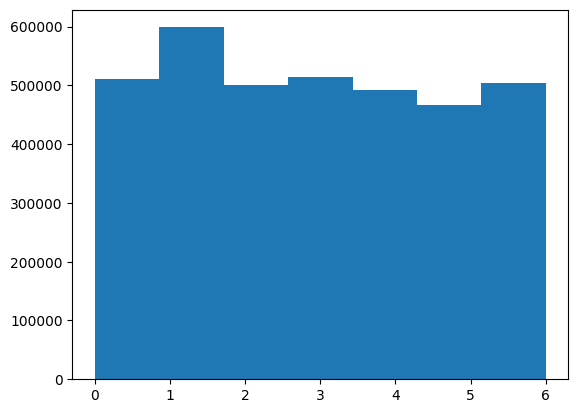

In [15]:
#for col in ["", "tpep_dropoff_datetime", "passenger_count", "",  "payment_type", "PULocationID"]:
plt.hist(dataset["tpep_pickup_datetime"].dt.day_of_week,bins=7)

### Histogram of hour of day

(array([101898.,  65741.,  42649.,  27727.,  19738.,  24285.,  58703.,
        106019., 135426., 152979., 170337., 188606., 201967., 203613.,
        217339., 221873., 220953., 237924., 253314., 230980., 196474.,
        190822., 175247., 143681.]),
 array([ 0.        ,  0.95833333,  1.91666667,  2.875     ,  3.83333333,
         4.79166667,  5.75      ,  6.70833333,  7.66666667,  8.625     ,
         9.58333333, 10.54166667, 11.5       , 12.45833333, 13.41666667,
        14.375     , 15.33333333, 16.29166667, 17.25      , 18.20833333,
        19.16666667, 20.125     , 21.08333333, 22.04166667, 23.        ]),
 <BarContainer object of 24 artists>)

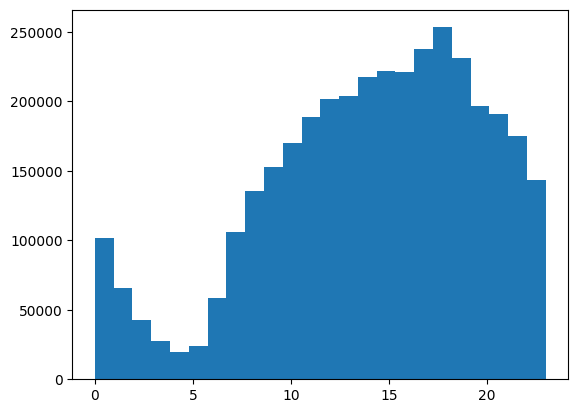

In [16]:
plt.hist(dataset["tpep_pickup_datetime"].dt.hour, bins=24)

In [17]:
dataset["tpep_dropoff_datetime"]-dataset["tpep_pickup_datetime"]


0         0 days 00:18:42
1         0 days 00:13:49
2         0 days 00:15:22
3         0 days 00:39:44
4         0 days 00:09:23
                ...      
3588290   0 days 00:21:01
3588291   0 days 00:14:28
3588292   0 days 00:21:00
3588293   0 days 00:26:01
3588294   0 days 00:07:01
Length: 3588295, dtype: timedelta64[us]

### Histogram of trip distance

(array([ 681329., 1136888.,  620100.,  312473.,  167875.,  105590.,
          72472.,   54141.,   54702.,   57613.,   48598.,   34008.,
          21169.,   13745.,   12460.,   15375.,   26499.,   47981.,
          41649.,   23347.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20.]),
 <BarContainer object of 20 artists>)

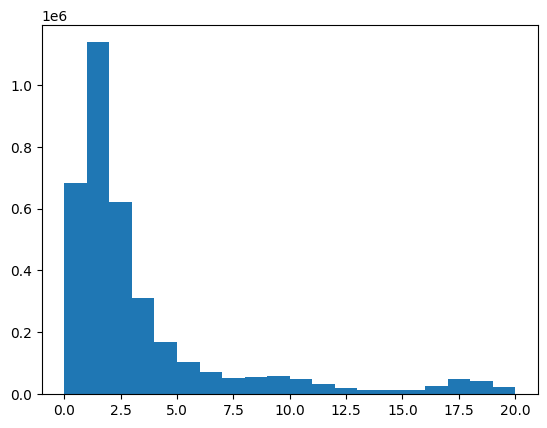

In [18]:
plt.hist(dataset["trip_distance"], bins=20, range=(0,20))

### Histogram of fare amount

(array([ 595497., 1603320.,  623481.,  246266.,  138172.,   88364.,
          45510.,   22404.,  160508.,   15003.]),
 array([ 0. ,  6.5, 13. , 19.5, 26. , 32.5, 39. , 45.5, 52. , 58.5, 65. ]),
 <BarContainer object of 10 artists>)

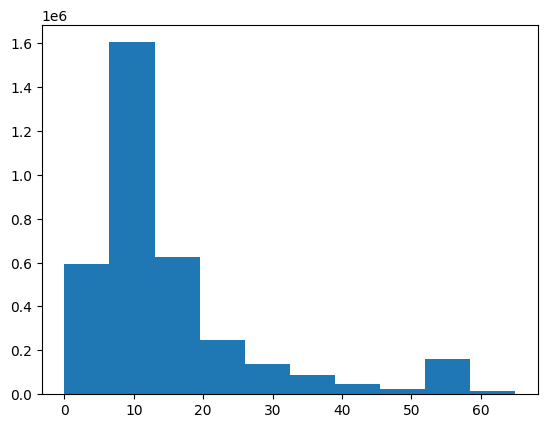

In [19]:
plt.hist(dataset["fare_amount"], bins=10, range=(0,65))